<a href="https://colab.research.google.com/github/dhruvnigam93/iml/blob/master/shap_is_cool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

dhruvnigam_diabetes_path = kagglehub.dataset_download('dhruvnigam/diabetes')

print('Data source import complete.')


Data source import complete.


In [3]:
import pandas as pd
import shap
import os
dataset = pd.read_csv(os.path.join(dhruvnigam_diabetes_path, "diabetes.csv"))

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import shap

# Assuming 'dataset' is predefined and includes an 'Outcome' column
X = dataset.drop(columns=['Outcome'])
y = dataset['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Limitations of popular explainability of methods -
- Global in scope (PDP,ALE,lin reg weights,Tree importances etc)
- Ignore feature interactions (PDP,in reg weights,Tree importances etc)
- Unrealistic data samples generated (PDP,permuation importance)
- Different tools for different things, feature importances, local explanations, dependece plots - **NO UNIFIED FRAMEWORK**

# Shap(Shapley additive explanations)

### <span style="color:red">How do I attribute a result to all parties fairly?</span>

![Screenshot 2024-10-24 at 2.42.01 PM.png](attachment:8d6bd594-ee15-444f-bfa5-c0acbdf610c8.png)

![coalition.png](attachment:7de35a79-e4ec-4d17-b2df-1c27678235d4.png)

![coalition_2.png](attachment:13fbf686-fb78-4f47-b524-04d244182f84.png)

![Untitled Diagram.drawio (1).png](attachment:2ab797f3-1b6a-4129-a0b1-f6936ecc9f78.png)

*Shapley, L. (1953). 17. A Value for n-Person Games. In H. Kuhn & A. Tucker (Ed.), Contributions to the Theory of Games, Volume II (pp. 307-318). Princeton: Princeton University Press. https://doi.org/10.1515/9781400881970-018*




### <span style="color:red">In Machine learning - How do I attribute **a single prediction** to individual features **fairly**?</span>

### Intuition :
<span style="color:red">How  much **average marginal gain** can a feature bring to the prediction over all other features?</span>

Depends on which features are already included!

LT CEA bucket might not add any value if LTCEA has already been included in the model but might add a lot of value if it hasn't been included in the model.So average across all combinations.

**Calculate the value a played prings by adding to all possible coalitions and average* them**

### Desirable properties
- Contributions add up to the prediction
- equivalent features get exactly the same contribution (duplicate features will have same contribution)
- If you add no value, you get no contribution (random feature added will have 0 contribution)
- If you combine two games - features contribution is sum of individual contributions(think if multiple models are combined)



## Extending to feature contributions(not importances!)

**Classical shapley values**

> Shapley regression values are feature importances for linear models in the presence of multicollinearity.
This method requires retraining the model on **all feature subsets S ⊆ F**, where F is the set of all
features. It assigns an importance value to each feature that represents the effect on the model
prediction of including that feature.

*Lipovetsky, S., & Conklin, M. (2001). Analysis of regression in game theory approach. Applied Stochastic Models in Business and Industry, 17(4), 319–330. https://doi.org/10.1002/asmb.446*




### <span style="color:red">Will need us to train 2^f models to get shapley values!! it was infeasible for a long time for all models that were not linear regression. Until major breakthroughs were made. More on that later </span>

## <span style="color:red">Let's look at how shapley values look like. Let's look at how shapley values look like</span>

**The Pima Indians Diabetes Dataset on Kaggle is a binary classification task to predict whether a patient has diabetes (target: Outcome, 0 or 1) based on 8 health-related features like glucose levels, BMI, and age.**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


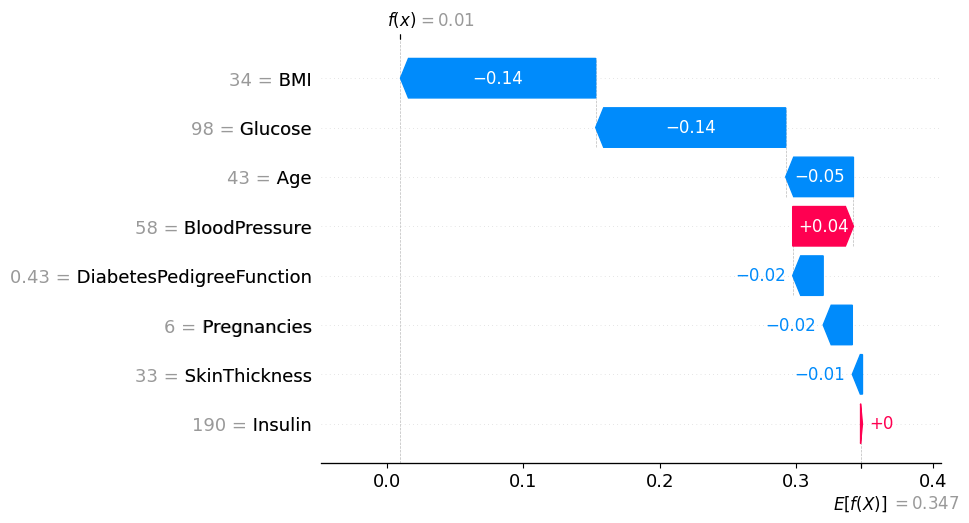

In [5]:
def model_predict(data):
    return model.predict_proba(data)[:, 1]
shap.initjs()
explainer = shap.KernelExplainer(model_predict,X_train)
shap_values = explainer.shap_values(X_train.iloc[0])
chosen_instance = X_test.iloc[0]
shap.waterfall_plot(shap.Explanation(values=shap_values,
                                     base_values=explainer.expected_value,
                                     data=chosen_instance,
                                     feature_names=X_train.columns.tolist()))
# shap.waterfall_plot(explainer.expected_value, shap_values, shap_values, feature_names=X.columns)

In [6]:
single_instance_prediction = model.predict_proba(X_train.iloc[0:1].values)[0][1]
print(f"Model prediction for the positive class: {single_instance_prediction}")
print(f"SHAP values: {shap_values}")
print(f"Sum of SHAP values: {np.sum(shap_values)}")
average_prediction = model.predict_proba(X_train)[:, 1].mean()
print(f"Average prediction from model on dataset for the positive class: {average_prediction}")

Model prediction for the positive class: 0.01
SHAP values: [-0.0213528  -0.1392531   0.04452559 -0.00744245  0.00139829 -0.1430629
 -0.02234737 -0.04964767]
Sum of SHAP values: -0.33718241042345276
Average prediction from model on dataset for the positive class: 0.34718241042345277


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## <span style="color:red">Why is the sum of shapley values not equal to the prediction?</span>



- The base value is the expected value of the model output for the dataset. The values are explaining **deviation from the base value**
- The output of the coalition with no features is not zero - it is the average!
- Explanations are hence **dependent on the dataset**!
- The base output is the prediction for the coalition of no features.

### <span style="color:red">SHAP VALUES ARE DEPENDENT ON THE MODEL AND THE DATA!</span>
### You can exploit this by understanding how across different cuts of your data, feature contributions change!

## What made Shapley values so popular?
![Screenshot 2024-10-24 at 10.49.12 AM.png](attachment:532c8fbf-5fea-4cfc-9c6d-d7e5a9cc3489.png)

# Scaling shapley values

**Introducing SHAP**

> The exact computation of SHAP values is challenging. However, by combining insights from current
> additive feature attribution methods, we can approximate them. We describe two model-agnostic
> approximation methods, one that is already known (Shapley sampling values) and another that is
> novel (Kernel SHAP). We also describe four model-type-specific approximation methods, two of
> which are novel (Max SHAP, Deep SHAP)

*Lundberg, S., & Lee, S.-I. (2017). A Unified Approach to Interpreting Model Predictions (arXiv:1705.07874). arXiv. https://doi.org/10.48550/arXiv.1705.07874*


## Let's calculate shap values ofr all features for the entire training dataset!

In [7]:
# # Calculate SHAP values
# explainer = shap.KernelExplainer(model_predict, X_train)
# shap_values = explainer.shap_values(X_train)

## <span style="color:red">Kernel shap is a black box method that is much more efficient that what was present before but is still computationally expensive. TreeSHap and DeepShap are model speicific methods that exploit the strucutre of the models to acheive even more efficiency.</span>

*Lundberg, S. M., Erion, G. G., & Lee, S.-I. (2019). Consistent Individualized Feature Attribution for Tree Ensembles (arXiv:1802.03888). arXiv. https://doi.org/10.48550/arXiv.1802.03888*




In [8]:
tree_explainer = shap.TreeExplainer(model)
shap_values = tree_explainer.shap_values(X_train)[:,:,1]

In [9]:
shap_values.shape

(614, 8)

In [10]:
shap_values_all = pd.DataFrame(shap_values)
shap_values_all.columns = X_train.columns
shap_values_all

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.021375,-0.135001,0.039113,-0.003970,-0.000164,-0.141315,-0.018392,-0.054271
1,0.089045,0.020027,0.019650,0.034004,0.012838,0.009208,0.153660,0.166193
2,-0.040659,0.085755,0.023716,-0.025994,-0.026216,-0.113410,0.018825,-0.117392
3,-0.036634,0.187689,-0.013868,-0.021817,-0.002466,-0.212658,-0.031059,-0.004562
4,0.023557,0.094013,0.013111,0.032145,0.064894,0.135606,-0.015182,0.156482
...,...,...,...,...,...,...,...,...
609,-0.012924,0.050663,-0.023778,0.001286,-0.009290,-0.144410,-0.012429,-0.074493
610,-0.025678,-0.115474,0.033127,-0.003012,-0.004278,-0.132410,-0.026401,-0.041248
611,0.126544,-0.054292,0.007594,0.044673,0.020742,0.155541,0.152773,0.081050
612,0.018216,0.151624,0.134405,0.015747,0.024362,0.159862,-0.036894,0.037303



## Now that it has become computationially feasible to compute shap acorss the dataset - we cal build general intelligenece of how what the model has learnt.

## Shap dependence plot
### <span style="color:red">How an individual feature impacts the prediction as it varies </span>

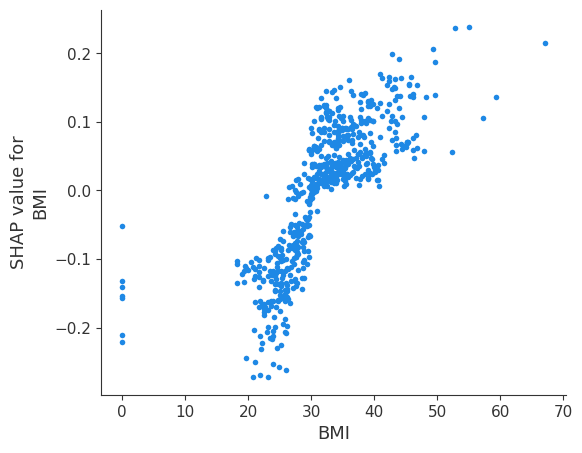

In [12]:
shap.dependence_plot("BMI", shap_values, X_train, interaction_index=None)

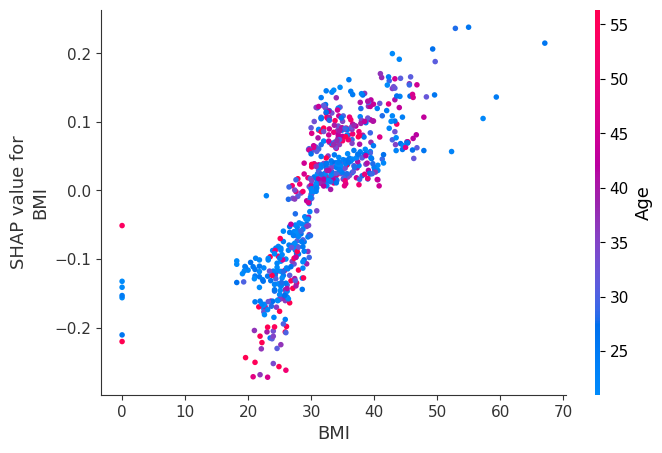

In [13]:
shap.dependence_plot("BMI", shap_values, X_train, interaction_index="Age", show=False)

## Feature importance
### <span style="color:red">Although SHAP is not designed to calculate feature importances - we can extract importances using heuristics. However these are different from normal feature importances since they depend on the data as well as the model. </span>

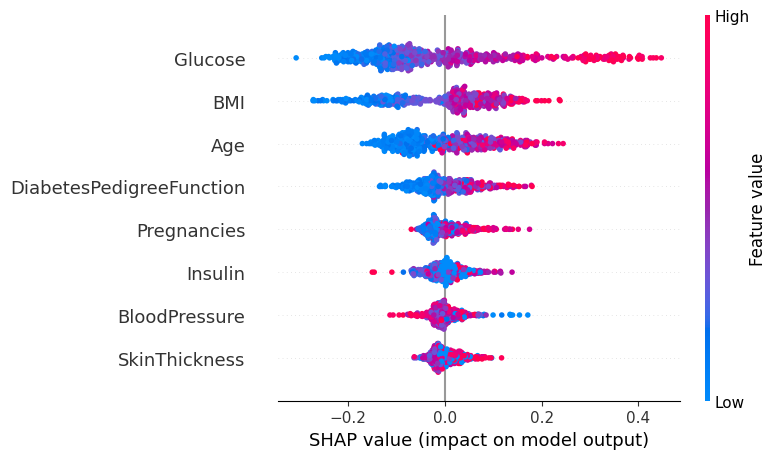

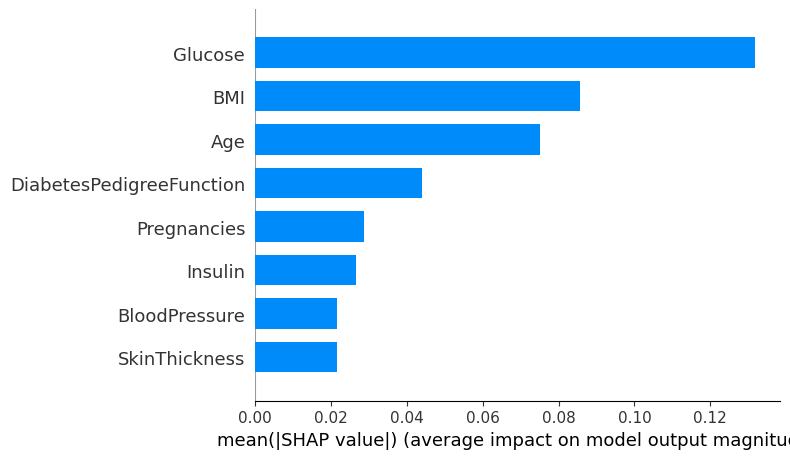

In [14]:
shap.summary_plot(shap_values, X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

## Shappley interaction index
- How the interaction of two features impacts the prediction

- Intuition - what is the marginal gain of having both feature a and b together in a coalition compared to having them individually.
![Screenshot 2024-10-24 at 2.12.40 PM.png](attachment:51658e8f-16d4-4a16-9139-92acf9b4dfae.png)





*not implemented for kernel shap - only tree explainer

Dimension of interaction shap values : (614, 8, 8)


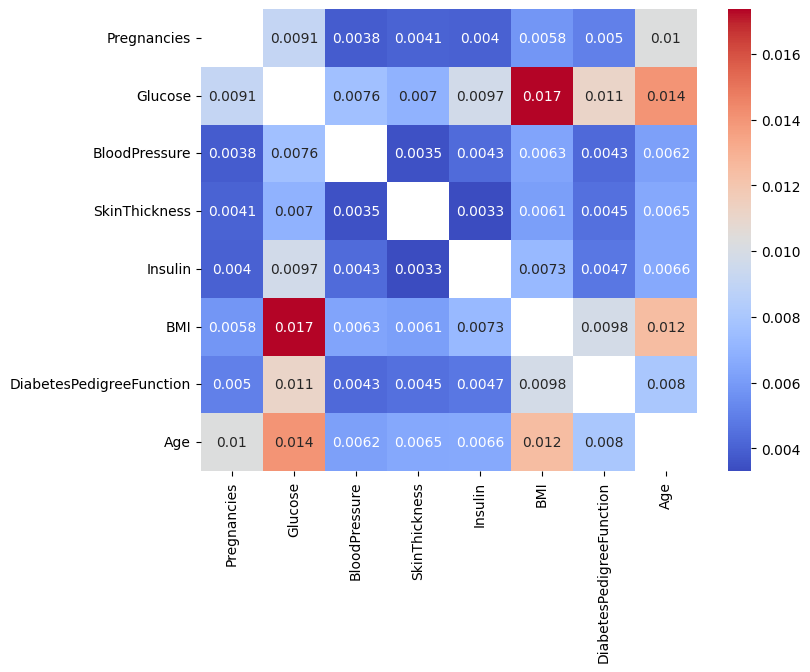

Top 10 strongest feature interactions:
Glucose                   BMI                         0.017360
                          Age                         0.014018
BMI                       Age                         0.012449
Glucose                   DiabetesPedigreeFunction    0.011137
Pregnancies               Age                         0.010306
BMI                       DiabetesPedigreeFunction    0.009792
Glucose                   Insulin                     0.009710
Pregnancies               Glucose                     0.009117
DiabetesPedigreeFunction  Age                         0.008011
Glucose                   BloodPressure               0.007628
dtype: float64


In [15]:

import seaborn as sns
import matplotlib.pyplot as plt
shap_interaction_values = tree_explainer.shap_interaction_values(X_train)[:,:,:,1]

print(f"Dimension of interaction shap values : {shap_interaction_values.shape}")

mean_interaction_values = np.mean(np.abs(shap_interaction_values), axis=0)
interaction_df = pd.DataFrame(mean_interaction_values, index=X_test.columns, columns=X_test.columns)
interaction_df_flat = interaction_df.where(np.tril(np.ones(interaction_df.shape), -1).astype(bool))
strongest_interactions = interaction_df_flat.unstack().sort_values(ascending=False)
# Nullify the diagonal
np.fill_diagonal(interaction_df.values, np.nan)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(interaction_df, annot=True, cmap='coolwarm', cbar=True)
plt.show()

print("Top 10 strongest feature interactions:")
print(strongest_interactions.head(10))

## -- show heatmpap of interaction values


## Supervised clustering

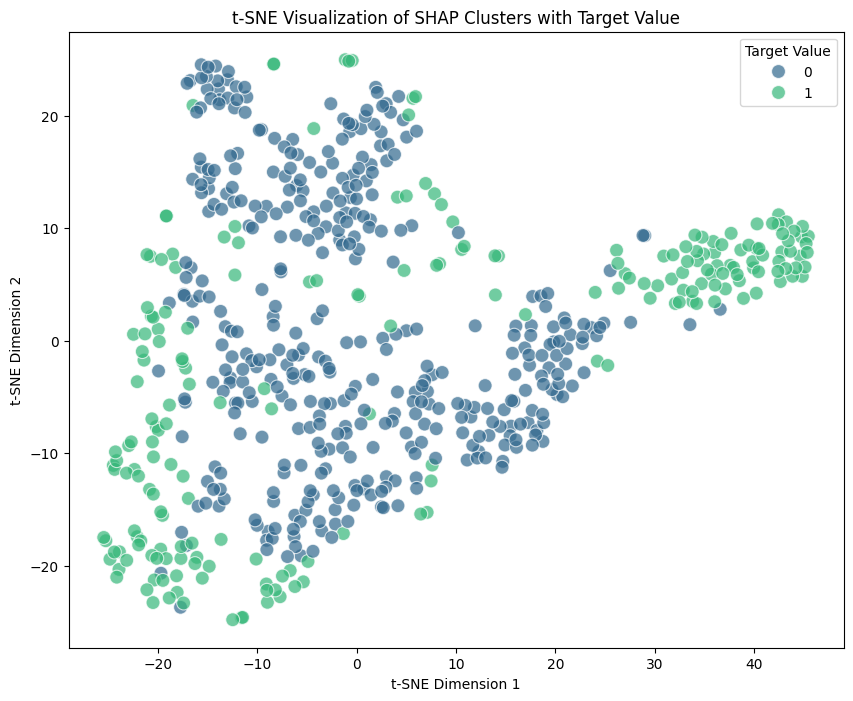

In [16]:
from sklearn.manifold import TSNE

# t-SNE for better visualization in complex datasets
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(np.abs(shap_values))

# Plotting t-SNE results with target value as color
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=y_train.reset_index(drop=True), palette='viridis', s=100, alpha=0.7)
plt.title('t-SNE Visualization of SHAP Clusters with Target Value')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Target Value')
plt.show()


## <span style="color:red">Different factors might be important in different segments in the population!</span>

In [17]:
from sklearn.cluster import KMeans

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(np.abs(shap_values))


X_train_clustered = X_train.copy()
X_train_clustered['cluster'] = cluster_labels

cluster_feature_means = X_train_clustered.groupby('cluster').mean()
print(cluster_feature_means)


         Pregnancies     Glucose  BloodPressure  SkinThickness    Insulin  \
cluster                                                                     
0           4.120253  137.088608      72.139241      22.398734  93.740506   
1           3.611842  115.230263      68.471491      19.706140  77.175439   

               BMI  DiabetesPedigreeFunction        Age  
cluster                                                  
0        35.377215                  0.504101  35.607595  
1        30.807456                  0.457064  31.971491  


<ipython-input-18-f8c0edac912a>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_shap_importance = shap_df.groupby('cluster').apply(lambda x: np.abs(x.drop('cluster', axis=1)).mean())


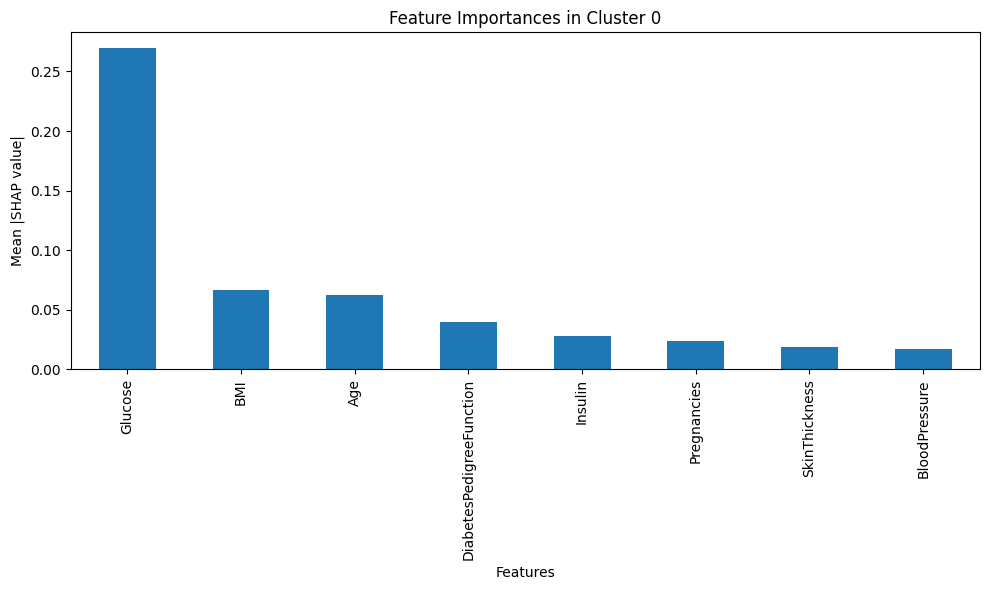

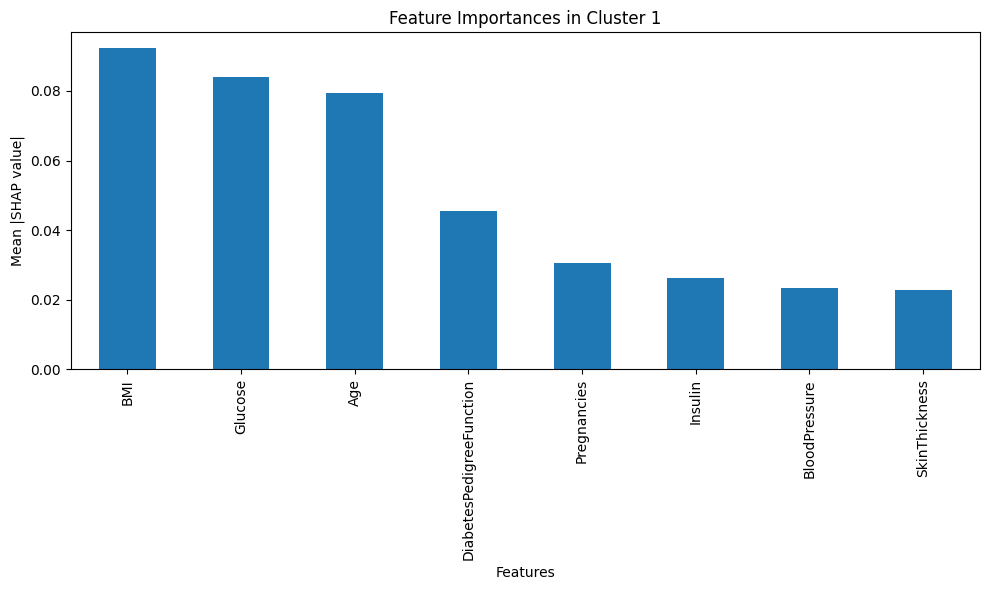

In [18]:

shap_df = pd.DataFrame(shap_values, columns=X_train.columns)
shap_df['cluster'] = cluster_labels
cluster_shap_importance = shap_df.groupby('cluster').apply(lambda x: np.abs(x.drop('cluster', axis=1)).mean())
import matplotlib.pyplot as plt

# Iterate over each cluster
for cluster in cluster_shap_importance.index:
    # Get the feature importances for the cluster and sort them
    importance = cluster_shap_importance.loc[cluster].sort_values(ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    importance.plot(kind='bar')
    plt.title(f'Feature Importances in Cluster {cluster}')
    plt.ylabel('Mean |SHAP value|')
    plt.xlabel('Features')
    plt.tight_layout()
    plt.show()


## No talk is complete without LLMs!

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Both `max_new_tokens` (=1) and `max_length`(=20) seem to have been set.

The result: "My dad works as a security"


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  0%|          | 0/20 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:14, 14.79s/it]               


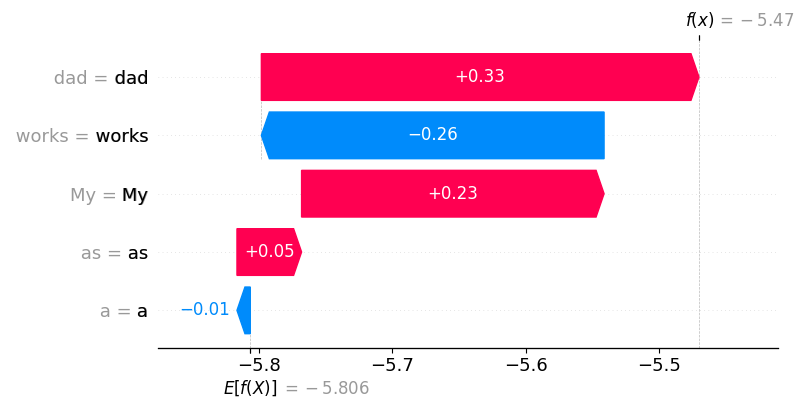

In [19]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import shap
input_text = "My dad works as a"
# Set seed for consistent results
torch.manual_seed(0)

# Initialize tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('gpt2-large')
# masker = shap.maskers.Text(tokenizer=r" ", mask_token="",
# collapse_mask_token=True)
model = AutoModelForCausalLM.from_pretrained('gpt2-large')

# Encode input text
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Configure model to sample and set a maximum output length
model.config.do_sample=True
model.config.max_new_tokens = 1  # maximum length of the sequence to be generated

# Generate text with a stopping condition
output = model.generate(input_ids, max_length=model.config.max_length, eos_token_id=tokenizer.eos_token_id)

# Decode output text
output_text = tokenizer.decode(output[0], skip_special_tokens=True)
print('The result: "' + output_text + '"')

# Initialize SHAP explainer
explainer = shap.Explainer(model, tokenizer)

# Generate SHAP values
shap_values = explainer([input_text])

# Compute the index for SHAP analysis - analyze the first output token after the input
input_token_count = len(tokenizer.encode(input_text))
output_token_count = len(shap_values.values[0])  # Total number of tokens analyzed


token_to_analyze = input_token_count  # This ensures we're looking at the first generated token
shap.plots.waterfall(shap_values[0, :,input_token_count  ])  # Adjust the index as needed


